In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('Admission_Predict.csv')

In [8]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
df.shape

(400, 9)

In [10]:
#For converting this dataset into categorical data we use "Binarizer"

from sklearn.preprocessing import Binarizer

In [12]:
binary = Binarizer(threshold = 0.75)
df['Chance of Admit ']

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [15]:
df['Chance of Admit '] = binary.fit_transform(df[['Chance of Admit ']]) 

In [16]:
df['Chance of Admit ']

0      1.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
395    1.0
396    1.0
397    1.0
398    0.0
399    1.0
Name: Chance of Admit , Length: 400, dtype: float64

In [18]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


In [20]:
#Here we drop 'Chance of Admit' coloumn
# 'x' will be considered as input & 'y' will be considered as output

x = df.drop('Chance of Admit ', axis = 1)
y = df['Chance of Admit ']

In [21]:
x

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1
396,397,325,107,3,3.0,3.5,9.11,1
397,398,330,116,4,5.0,4.5,9.45,1
398,399,312,103,3,3.5,4.0,8.78,0


In [22]:
y

0      1.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
395    1.0
396    1.0
397    1.0
398    0.0
399    1.0
Name: Chance of Admit , Length: 400, dtype: float64

In [24]:
y.astype('int')

0      1
1      1
2      0
3      1
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Chance of Admit , Length: 400, dtype: int32

<AxesSubplot:xlabel='Chance of Admit ', ylabel='count'>

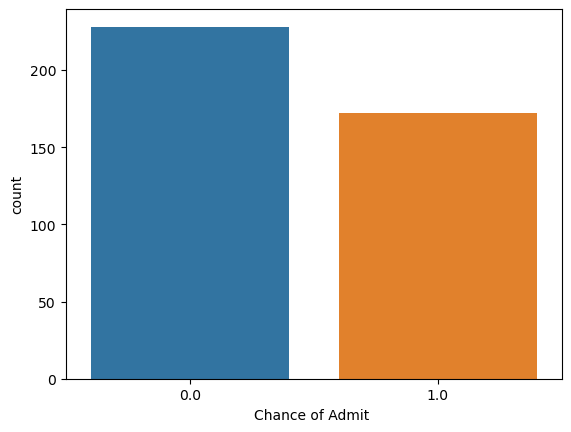

In [25]:
sns.countplot(x = y)

In [26]:
y.value_counts()

0.0    228
1.0    172
Name: Chance of Admit , dtype: int64

In [27]:
#CrossValidation

from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0,test_size=0.25)

In [30]:
x_train.shape

(300, 8)

In [31]:
x_test.shape

(100, 8)

In [32]:
x_test

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
132,133,309,105,5,3.5,3.5,8.56,0
309,310,308,110,4,3.5,3.0,8.60,0
341,342,326,110,3,3.5,3.5,8.76,1
196,197,306,105,2,3.0,2.5,8.26,0
246,247,316,105,3,3.0,3.5,8.73,0
...,...,...,...,...,...,...,...,...
146,147,315,105,3,2.0,2.5,8.48,0
135,136,314,109,4,3.5,4.0,8.77,1
390,391,314,102,2,2.0,2.5,8.24,0
264,265,325,110,2,3.0,2.5,8.76,1


In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dtc = DecisionTreeClassifier(random_state=1)

In [35]:
#fit is used to fit our training data into model

dtc.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [37]:
#Unseen data is coming through 'y_pred' towards our model

y_pred = dtc.predict(x_test)

In [40]:
result = pd.DataFrame({'actual' : y_test, 'predicted' : y_pred})

In [41]:
result

,actual,predicted
132,0.0,0.0
309,0.0,0.0
341,1.0,1.0
196,0.0,0.0
246,0.0,1.0
...,...,...
146,0.0,0.0
135,1.0,1.0
390,0.0,0.0
264,0.0,0.0


In [44]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

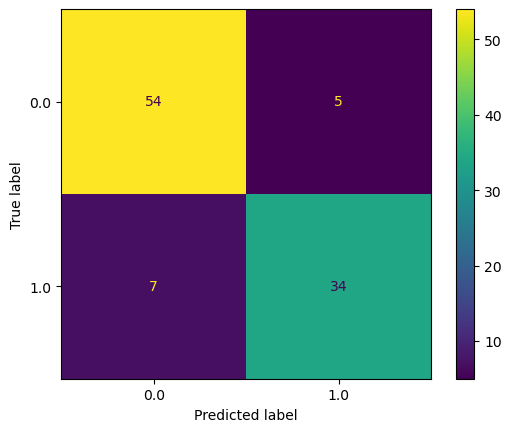

In [48]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [50]:
print(accuracy_score(y_test, y_pred))

0.88


In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.92      0.90        59
         1.0       0.87      0.83      0.85        41

    accuracy                           0.88       100
   macro avg       0.88      0.87      0.88       100
weighted avg       0.88      0.88      0.88       100



In [52]:
x_test

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
132,133,309,105,5,3.5,3.5,8.56,0
309,310,308,110,4,3.5,3.0,8.60,0
341,342,326,110,3,3.5,3.5,8.76,1
196,197,306,105,2,3.0,2.5,8.26,0
246,247,316,105,3,3.0,3.5,8.73,0
...,...,...,...,...,...,...,...,...
146,147,315,105,3,2.0,2.5,8.48,0
135,136,314,109,4,3.5,4.0,8.77,1
390,391,314,102,2,2.0,2.5,8.24,0
264,265,325,110,2,3.0,2.5,8.76,1


In [60]:
a = [[136,314,109,4,3.5,4.0,8.77,1]]
dtc.predict(a)[0]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0

In [61]:
from sklearn.tree import plot_tree

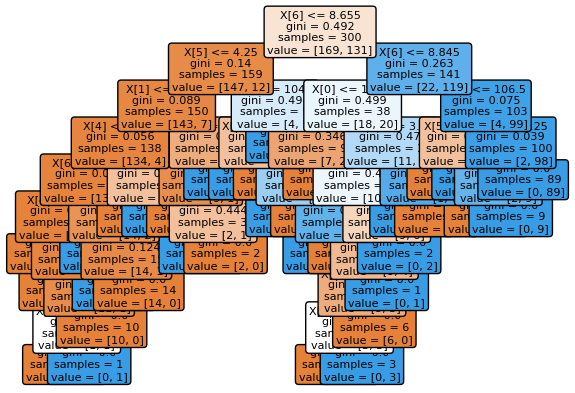

In [75]:
plot_tree(dtc, fontsize = 8, rounded = 1, filled = 1);